# Tienda Online de Videojuegos

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

Descripción de datos:
* Name (Nombre)
* Platform (Plataforma)
* Year_of_Release (Año de lanzamiento)
* Genre (Género)
* NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
* EU_sales (ventas en Europa en millones de dólares estadounidenses)
* JP_sales (ventas en Japón en millones de dólares estadounidenses)
* Other_sales (ventas en otros países en millones de dólares estadounidenses)
* Critic_Score (máximo de 100)
* User_Score (máximo de 10)
* Rating (ESRB)
Es posible que los datos de 2016 estén incompletos.

## Archivo de datos: Lectura e información general

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

#importamos la informacion del archivo en el dataframe df

df = pd.read_csv('/datasets/games.csv')

df.info()
print()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Preparación de los datos

### Homogenizamos los nombres de campos de las columnas

In [2]:
#Nombre de columnas iniciales
print(df.columns)
#Pasamos todos los nombres de las columnas a minusculas
df_new = []
for columns in df.columns:
    df_new.append(columns.lower())
    
df.columns = df_new

#Nombre de columnas finales
print(df.columns)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Validación de los tipos de datos de cada columna

In [3]:
#tipo de datos iniciales del dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Identificación y explicación de los campos a corregir:

- "year_of_release": figura como tipo "float64" deberia figurar como "int64" porque los años son números enteros.
- "critic_score": figura como tipo "float64" deberia figurar como "int64" porque se califica bajo números enteros.
- "user_score": figura como tipo "object" deberia figurar como "float64" porque la calificacion es de 1-10 considerando decimales, tenerlo bajo el tipo de datos "object" impediria manipular la columna (realizar operaciones aritmeticas).


In [4]:
#corrigiendo tipos de datos de las columnas identificadas
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')

#tipo de datos finales del dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


### Revisión y tratamiento de valores nulos y duplicados.

In [5]:
#Información general de datos nulos por campos
print('valores nulos por campo:')
print(df.isnull().sum())

#validacion de filas duplicadas
print('\nfilas duplicadas:', df.duplicated().sum())

valores nulos por campo:
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

filas duplicadas: 0


- campo "name" y "genre": Los campos nulos corresponden a dos registros (0.012% del total de registros) que solo contienen informacion del género y ventas. Al ser una representación muy baja de registros respecto al total y no cuenta con uno de los principales datos como son el nombre del juego podríamos prescindir de estos registros ya que no afectaría el análisis del proyecto.
¿Por qué crees que los valores están ausentes? Podría deberse a la antigüedad de la información.

In [6]:
#registros que figuran con nulos en el campo "name" y "genre"
df[df['name'].isnull() == True]
df[df['genre'].isnull() == True]

#eliminamos los dos registros del dataframe
df.drop(df[df['name'].isnull() == True].index, inplace=True)
df.reset_index(drop=True, inplace=True)

#Vista general posterior a la eliminación de valores nulos en los campos "name" y "genre"
df.info()

#Cantidad de valores nulos por campo
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

- "year_of_release": Hay 269 registros nulos (1.6% del total de registros), dado que los campos de estos registros cuentan con varios campos importantes para el análisis no podríamos prescindir de estos registros porque sí podría impactar en el análisis, sobretodo cuando se evaluen las ventas. Al ser un campo cualitativo podría reemplazarse los campos nulos por algún carácter; sin embargo, si se realiza ese cambio tendríamos que tener identificado este valor al momento de realizar filtros, por temas prácticos lo mantendremos en NULL.
¿Por qué crees que los valores están ausentes? Podría deberse porque al momento de recopilar la información no consideraron importante guardar ese dato en el repositorio o porque no se tiene dicha información.

- "critic_score": Hay 8,578 registros nulos (51.3% del total de registros), la cantidad de campos nulos representa información significativa para el análisis del proyecto. Este campo es cuantitativo por ello es mejor mantenerlo en NULL ya que si lo reemplazamos por algún valor podríamos afectar los análisis estadísticos.
¿Por qué crees que los valores están ausentes? Podría deberse a que son juegos que los críticos no consideraron importante calificarlos o porque no tuvo tanta acogida que ni siquiera aparecio en el radar de algún crítico.

- "user_score": Hay 6,701 registros nulos (40.1% del total de registros), la cantidad de campos nulos representa información significativa para el análisis del proyecto. Adicionalmente a los campos en nulo se observan valores en "tbd" lo cual dificulta la manipulación de este campo (operaciones estadísticas y aritméticas). Por lo que se reemplazará esos campos por valores nulos. Luego de este cambio observamos que tenemos 9,123 registros nulo (54.6% del total de registros).
Ahora que solo tenemos valores en nulo y datos decimales podemos cambiar el tipo de dato a float y como el tipo de dato del campo quedaría como cuantitativo, mantenemos los campos en NULL ya que si lo reemplazamos por algún valor podríamos afectar los análisis estadísticos.
¿Por qué crees que los valores están ausentes? Podría deberse a que los usuarios que lo jugaron no quisieron calificar por diversos motivos o porque son juegos con baja acogida que ni llegaron a ser calificados por algun usuario.

In [7]:
#En el campo "user_score" reemplazamos los valores 'tbd' por valores en nulo.
df['user_score'].replace('tbd', np.nan, inplace = True)

#Convertimos el tipo de campo de 'object' a 'float64'
df['user_score'] = df['user_score'].astype('float')

#Informacion del dataframe luego de hacer el reemplazo de 'tbd' por NULL
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


- "rating": Hay 6,764 registros nulos (40.5% del total de registros), la cantidad de campos nulos representa información significativa para el análisis del proyecto. Al ser un campo cualitativo podría reemplazarse los campos nulos por algún carácter; sin embargo, si se realiza ese cambio tendríamos que tener identificado este valor al momento de realizar filtros, por temas prácticos lo mantendremos en NULL.
¿Por qué crees que los valores están ausentes? Podría deberse a que son juegos para los cuales no es necesario tener un rating para su distribución o porque talvez en algún país es voluntario darle un rating a los juegos.

### Cálculo de Ventas Totales para cada juego

In [8]:
#Creamos una columna de venta total por juego "total_sales"
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#Comprobamos el dataframe
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


## Análisis de los datos

### ¿Son significativos los datos de cada período?
Mira cuántos juegos fueron lanzados en diferentes años. 

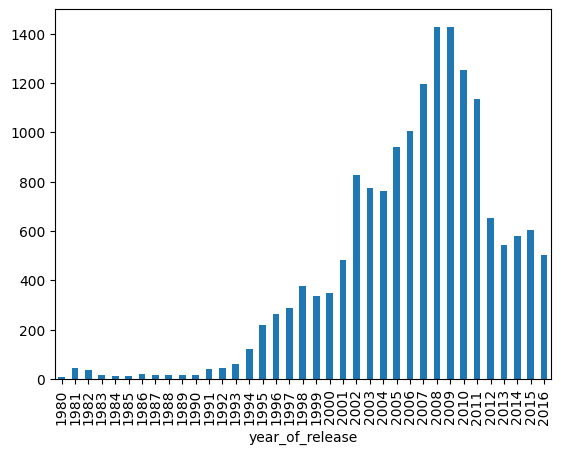

In [9]:
gf = df.groupby('year_of_release')['name'].count()
gf.plot(x='year_of_release', kind='bar')
plt.show()

Se observa que hubo un pico de lanzamiento de juegos a partir del año 2000.

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

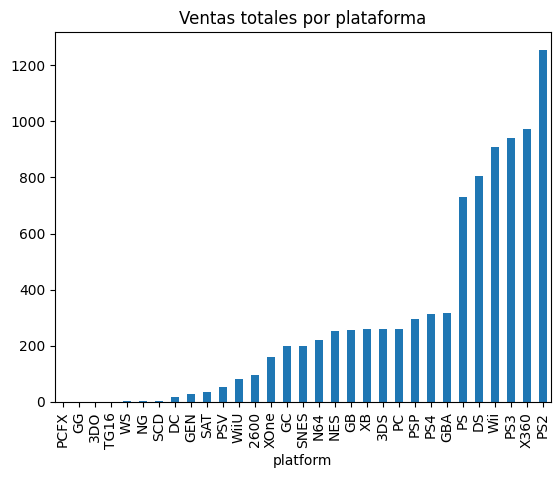

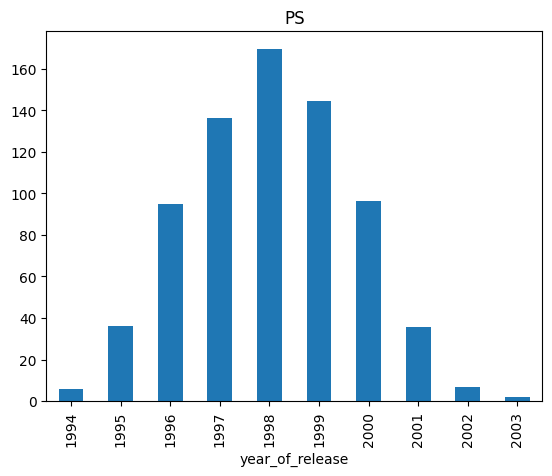

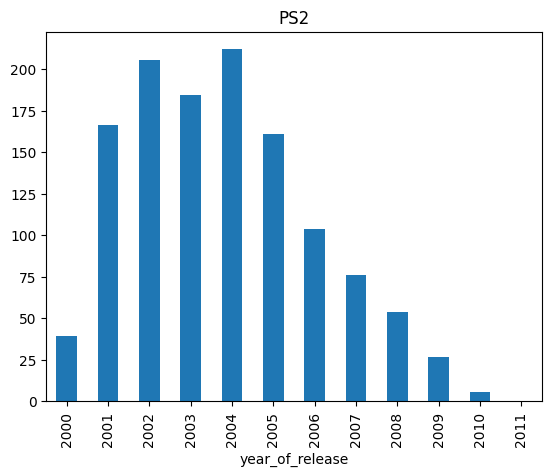

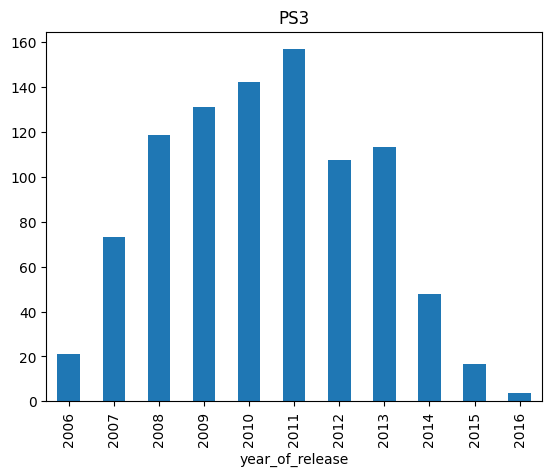

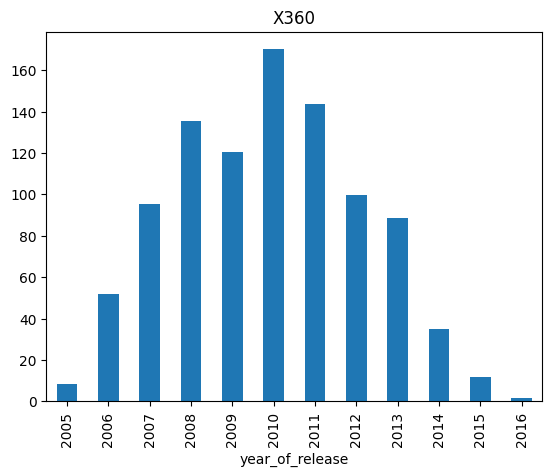

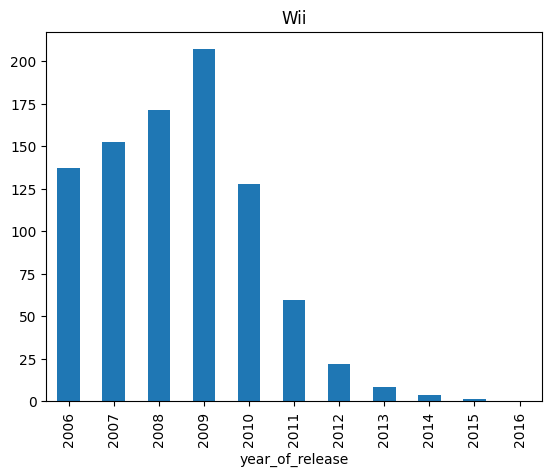

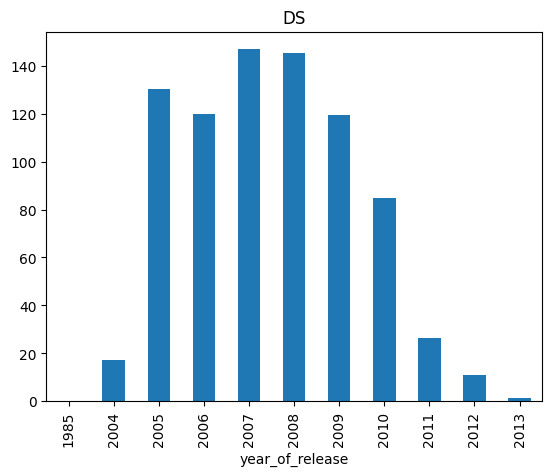

In [10]:
#Creamos una tabla con el total de ventas por plataforma y lo ordenamos por volumen de ventas
gf = df.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')

#Graficamos ventas por plataforma para identificar las plataformas con más ventas
gf.plot(x= 'platform', kind='bar', title='Ventas totales por plataforma', legend=False)

#Creamos una tabla con el total de ventas por plataforma y año de lanzamiento del juego
#Solo consideraremos las plataformas con más ventas de la tabla "gf" : PS, DS, Wii, PS3, X360, PS2

gf2 = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

p1 = gf2[gf2['platform']=='PS']
p2 = gf2[gf2['platform']=='PS2']
p3 = gf2[gf2['platform']=='PS3']
p4 = gf2[gf2['platform']=='X360']
p5 = gf2[gf2['platform']=='Wii']
p6 = gf2[gf2['platform']=='DS']

p1.plot(x= 'year_of_release', kind='bar', title='PS', legend=False)
p2.plot(x= 'year_of_release', kind='bar', title='PS2', legend=False)
p3.plot(x= 'year_of_release', kind='bar', title='PS3', legend=False)
p4.plot(x= 'year_of_release', kind='bar', title='X360', legend=False)
p5.plot(x= 'year_of_release', kind='bar', title='Wii', legend=False)
p6.plot(x= 'year_of_release', kind='bar', title='DS', legend=False)


Se observa las plataformas con mayores ventas totales fueron: PS, PS2, PS3, Wii y DS, y que en promedio esas plataformas tardaron en desaparecer 10 años.

### Determina para qué período debes tomar datos.
Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Para construir un modelo para el 2017, fitraría aquellas plataformas que tuvieron ventas en el 2016 y dado que en promedio tardan en desaparecer 10 años (basado en el ejercicio previo), consideraría un horizonte de ventas de 10 años.

Según el filtro realizado lineas abajo las plataformas que habría que considerar para construir el modelo de ventas para el 2017 serían: Wii, X360, PS3, PSV, WiiU, PC, 3DS, XOne, PS4.

In [11]:
#Ubicamos a las plataformas con ventas en el 2016
print(gf2[gf2['year_of_release']==2016]['platform'].unique())

['3DS' 'PC' 'PS3' 'PS4' 'PSV' 'Wii' 'WiiU' 'X360' 'XOne']


### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen?
Elige varias plataformas potencialmente rentables.

Las plataformas líderes en ventas son: PS, PS2, PS3, Wii y DS, sin embargo, para el 2016 sus ventas se redujeron o extiguieron. Por otro lado las plataformas que están creciendo pero aún no se han convertido en líderes en ventas son PSV, WiiU, PC, 3DS, XOne, PS4.

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

- Se observa que hay muchos valores atípicos en cada plataforma. Si quitamos esos valores atípicos, el rango de ventas totales va hasta 4 millones de dólares.
- Si existe diferencia de ventas entre plataformas donde sobresalen las plataformas: NES, GB y GEN.
- Se observa que la venta promedio en la mayoría de las plataformas son mayores a la mediana (tendencia asimetrica positiva a la derecha).
- También se observa que las ventas de los juegos en las plataformas por lo general van en el rango de 0 a 1 millón de dólares.

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

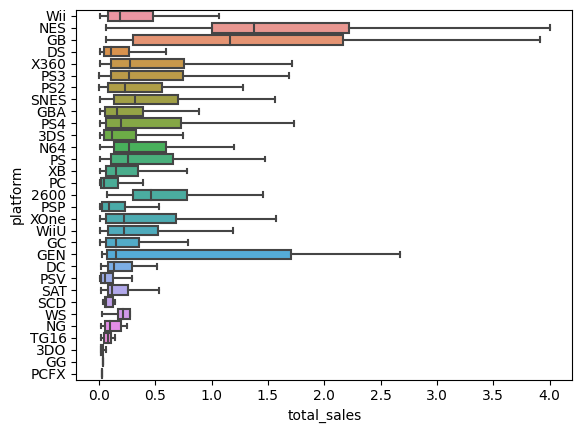

In [12]:
sns.boxplot(x='total_sales', y='platform', data = df, fliersize = 1, showfliers = False)


### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Se eligió como plataforma popular al PS2.
De lo cual se observo que:
- Las reseñas críticas de los usuarios no afectaron las ventas de los juegos en la plataforma PS2 (correlacion de 0.17).
- Las reseñas críticas de los profesionales no afectaron las ventas de los juegos en la plataforma PS2 (correlación de 0.40).
- Se podría inferir que las reseñas críticas de los profesionales al estar más cercano al 1 en correlación, podría decirse que es el factor que podría afectar a las ventas de los juegos en la plataforma PS2.

<AxesSubplot:xlabel='user_score'>

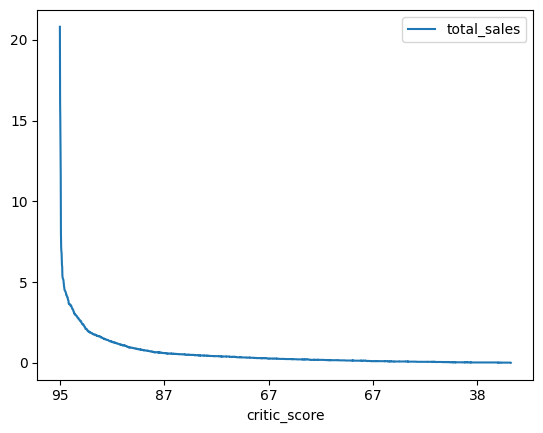

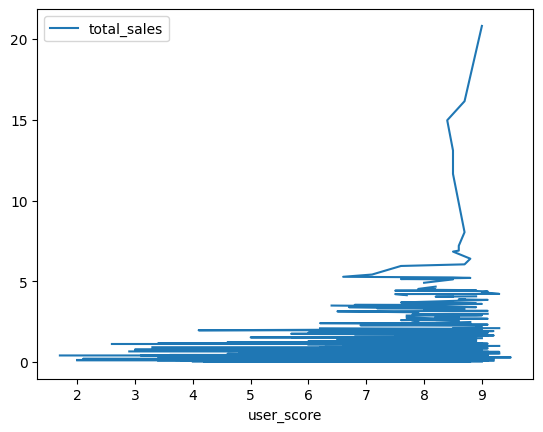

In [13]:
gf = df[df['platform']=='PS2']
gf.corr()

gf.plot(x='critic_score', y='total_sales')
gf.plot(x='user_score', y='total_sales')

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Se analizaron 2 plataformas adicionales: Wii y X360.
De ello, se concluye que no existe correlación entre las reseñas de los usuarios y de los profesionales con las ventas de los juegos en las plataformas seleccionadas.

Matriz de correlación de los juegos de la plataforma Wii

                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.085963 -0.064853 -0.052926    -0.082033   
na_sales               -0.085963  1.000000  0.971748  0.769498     0.988288   
eu_sales               -0.064853  0.971748  1.000000  0.775901     0.992596   
jp_sales               -0.052926  0.769498  0.775901  1.000000     0.769197   
other_sales            -0.082033  0.988288  0.992596  0.769197     1.000000   
critic_score            0.127918  0.178665  0.163757  0.195903     0.162130   
user_score              0.045019  0.112489  0.103332  0.127422     0.103334   
total_sales            -0.077321  0.992588  0.989535  0.813626     0.995140   

                 critic_score  user_score  total_sales  
year_of_release      0.127918    0.045019    -0.077321  
na_sales             0.178665    0.112489     0.992588  
eu_sales             0.163757    0.103332     0.989535  
jp

<AxesSubplot:xlabel='user_score'>

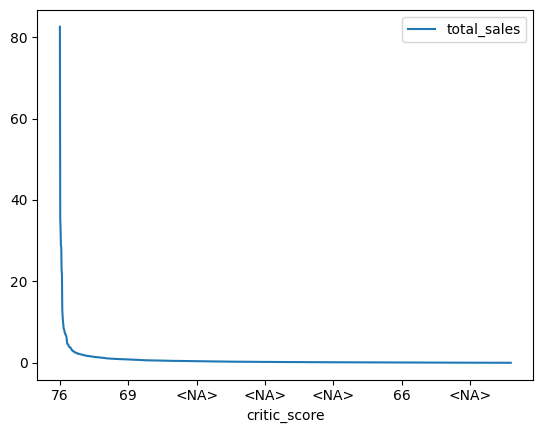

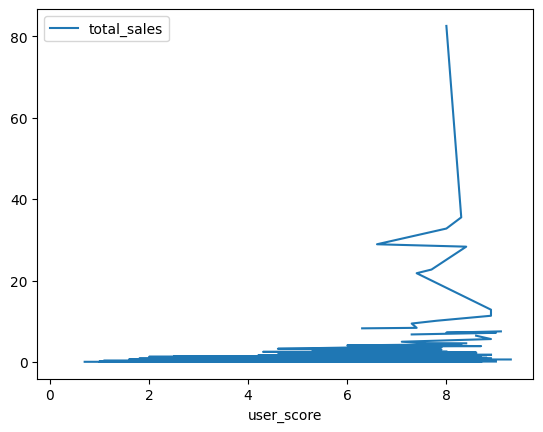

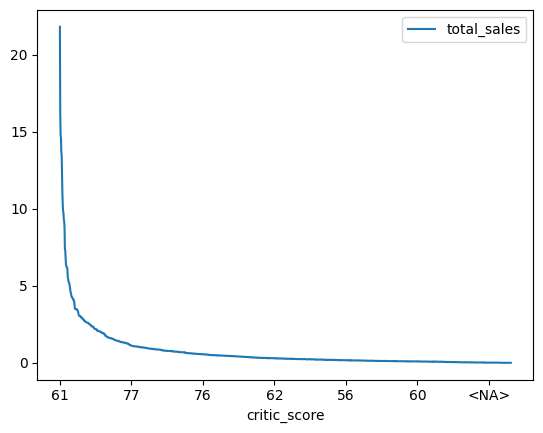

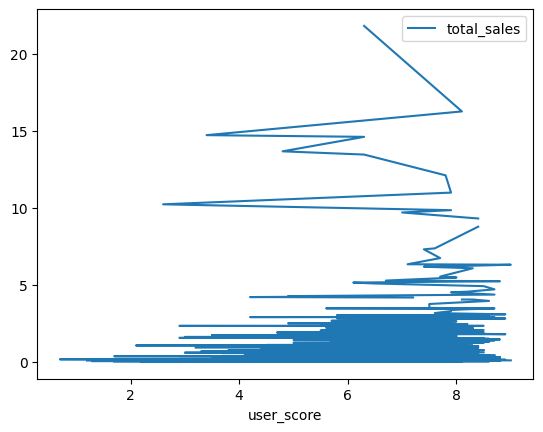

In [14]:
gf1 = df[df['platform']=='Wii']
gf2 = df[df['platform']=='X360']

#Matriz de correlación de los juegos de la plataforma Wii
print('Matriz de correlación de los juegos de la plataforma Wii\n')
print(gf1.corr())

#Gráfica de dispersión de los juegos de la plataforma Wii
gf1.plot(x='critic_score', y='total_sales')
gf1.plot(x='user_score', y='total_sales')

print('\n\n')

#Matriz de correlación de los juegos de la plataforma X360
print('Matriz de correlación de los juegos de la plataforma X360\n')
print(gf2.corr())

#Gráfica de dispersión de los juegos de la plataforma X360
gf2.plot(x='critic_score', y='total_sales')
gf2.plot(x='user_score', y='total_sales')

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

- Se observa que los géneros más rentables son: Action, Sports y Shooter.
- Se observa que los géneros más rentables son: Strategy, Adventure, Puzzle
- También se infiere que las reseñas críticas tanto de usuarios como de profesionales no influyen en las ventas de los genéros más rentables ni menos rentables.

           genre  total_sales
0         Action      1744.17
10        Sports      1331.27
8        Shooter      1052.45
7   Role-Playing       934.56
4       Platform       827.77
3           Misc       802.51
6         Racing       728.67
2       Fighting       447.53
9     Simulation       389.97
5         Puzzle       242.57
1      Adventure       237.59
11      Strategy       174.23
Top 3 de los generos más rentables:



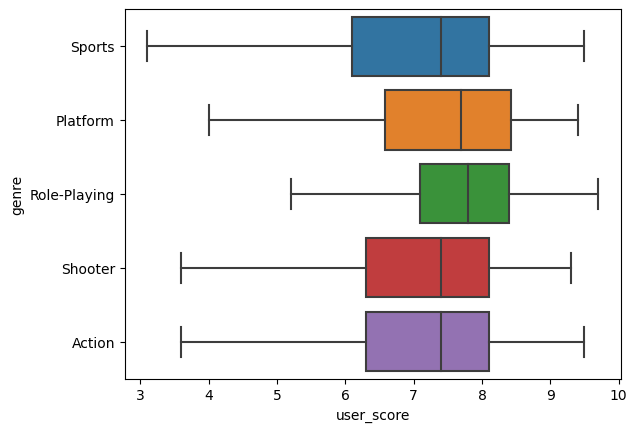

In [15]:
gf = df.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
print(gf)

print('Top 3 de los generos más rentables:\n')
df2 = df[df['genre'].isin(['Action','Sports','Shooter','Role-Playing','Platform'])]
#print(df2)

#sns.boxplot(x='total_sales', y='genre', data = df2, fliersize = 1, showfliers = False);
sns.boxplot(x='user_score', y='genre', data = df2, fliersize = 1, showfliers = False);

Top 3 de los generos menos rentables:



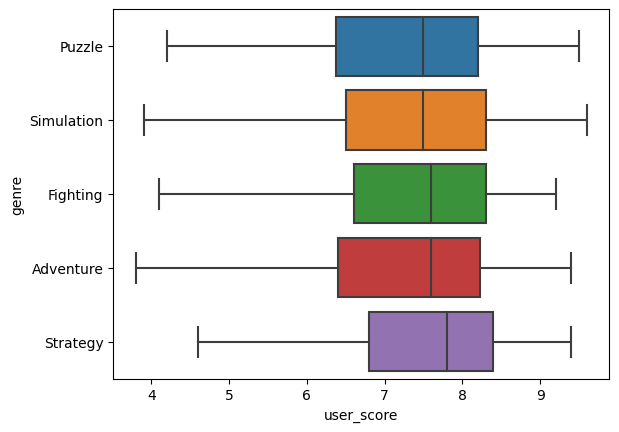

In [16]:
print('Top 3 de los generos menos rentables:\n')
df3 = df[df['genre'].isin(['Strategy','Adventure','Puzzle', 'Simulation','Fighting'])]
#print(df3)

#sns.boxplot(x='total_sales', y='genre', data = df3, fliersize = 1, showfliers = False);
sns.boxplot(x='user_score', y='genre', data = df3, fliersize = 1, showfliers = False);

## Crea un perfil de usuario para cada región
Para cada región (NA, EU, JP) determina:

### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Se observa que:
- En Norteamerica lideran las ventas las plataformas X360 y PS2.
- En Europa lideran las ventas laS plataformas PS2 y PS3.
- En Japón lidera la venta la plataforma DS.
- La plataforma que se venden en las 3 regiones y es una de las 5 principales en las 3 regiones es el PS2.
- Las plataformas PS3, X360 y Wii son las principales en Norteamerica y Europa.
- La plataforma DS es una de las principales en Japón y Norteamérica.
- La plataforma PS es una de las principales en Europa y Japón.
- Las plataformas 3DS y SNES solo estan en el top 5 de ventas en Japón.

AxesSubplot(0.125,0.11;0.775x0.77)


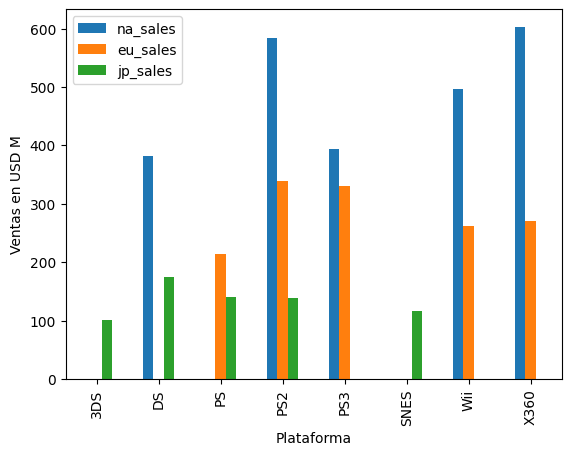

In [17]:
#construimos 3 tablas para identificar las plataformas principales en cada región
df_na = df.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
df_eu = df.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
df_jp = df.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)


#identificamos las 5 principales plataformas en cada región
pd.concat([df_na['platform'].head(5), df_eu['platform'].head(5), df_jp['platform'].head(5)]).unique()

#definimos un nuevo dataframe solo con las 5 principales plataformas por región
pd2 = pd.concat([df_na.head(5), df_eu.head(5), df_jp.head(5)])

#utilizamos un pivot_table para armar la gráfica de ventas por las plataformas principales de cada región
agg_dict = {'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales' : 'sum'}

grp = pd2.groupby('platform')

df2 = grp.agg(agg_dict).reset_index()

df2 = df2[df2['platform'].isin(['X360', 'PS2', 'Wii', 'PS3', 'DS', 'PS', 'SNES', '3DS'])]

#graficamos para analizar
print(df2.plot.bar(x='platform', ylabel='Ventas en USD M', xlabel='Plataforma'))

### Los cinco géneros principales. Explica la diferencia.

    Se observa que:
    - En las 3 regiones (Norteamérica, Europa y Japón) coiciden como principales los géneros de Action, Sports y Misc.
    - Action es el género líder en Norteamérica y Europa; sin embargo, en Japón lidera el género de "Role-Playing".
    - Platform es uno de los géneros principales en Norteamérica y Japón.
    - Shooter es uno de los géneros principales en Norteamérica y Europa.

AxesSubplot(0.125,0.11;0.775x0.77)


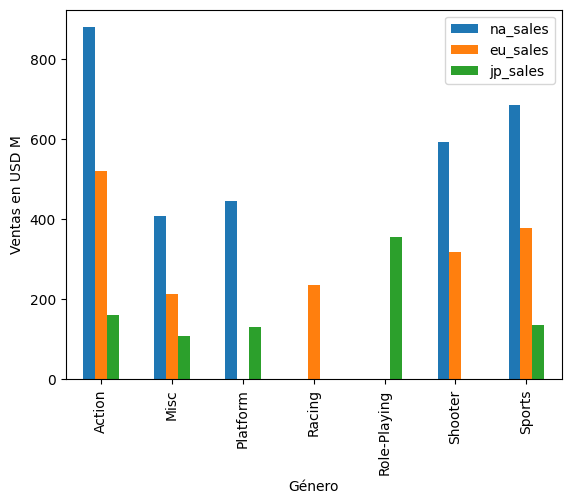

In [18]:
#construimos 3 tablas para identificar los genéros principales en cada región
df_na = df.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
df_eu = df.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
df_jp = df.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)


#identificamos las 5 principales genéros en cada región
pd.concat([df_na['genre'].head(5), df_eu['genre'].head(5), df_jp['genre'].head(5)]).unique()

#definimos un nuevo dataframe solo con las 5 principales plataformas por región
pd2 = pd.concat([df_na.head(5), df_eu.head(5), df_jp.head(5)])

#utilizamos un pivot_table para armar la gráfica de ventas por las plataformas principales de cada región
agg_dict = {'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales' : 'sum'}

grp = pd2.groupby('genre')

df2 = grp.agg(agg_dict).reset_index()

df2 = df2[df2['genre'].isin(['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 'Racing', 'Role-Playing'])]

#graficamos para analizar
print(df2.plot.bar(x='genre', ylabel='Ventas en USD M', xlabel = 'Género'))

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Considerando que el 60% de los juegos han sido clasificados, se observa que:
- Las ventas por regiones sí se ven afectadas por las clasificaciones.
- Las ventas se ven afectadas por la clasificación de los juegos según el siguiente orden:
  (E) Apto para todos, son los más vendidos.
  (M) Apto para personas de 17 años a más.
  (T) Apto para personas de 13 años a más.
  (E10+) Apto para personas de 10 años a más, los menos vendidos.
- Los juegos con clasificación AO, EC, K-A, RP son los que menos ventas han registrado.

AxesSubplot(0.125,0.11;0.775x0.77)


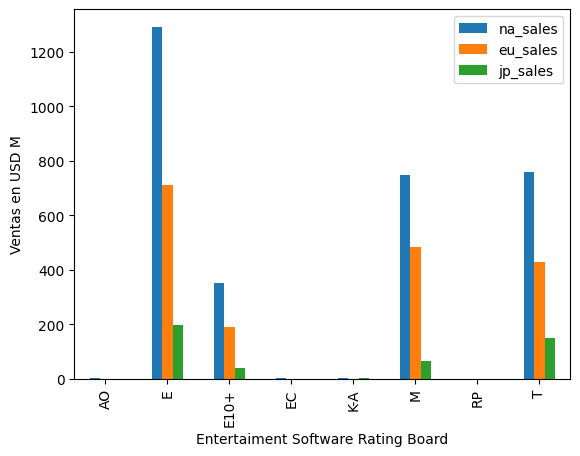

In [19]:
#Creamos una tabla con las ventas de todos los juegos que tiene rating.
agg_dict = {'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales' : 'sum'}

grp = df.groupby('rating')

df2 = grp.agg(agg_dict).reset_index()

#graficamos para analizar
print(df2.plot.bar(x='rating', ylabel='Ventas en USD M', xlabel = 'Entertaiment Software Rating Board'))

## Prueba de hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
Establece tu mismo el valor de umbral alfa y explica:

#### Cómo formulaste las hipótesis nula y alternativa.

Definimos la hipótesis nula(Ho) y la alternativa (H1) considerando la duda planteada en el enunciado del proyecto.

Ho = Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas.

H1 = Las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son distintas.

Para analizar la hipótesis necesitamos definimos el umbral alfa, para lo cual utilizaremos el valor en 0.05, valor que se suele usar por lo general, este número nos indica que la probabilidad de que rechacemos la hipótesis nula de manera errónea será el 5%.

#### Qué criterio utilizaste para probar las hipótesis y por qué.

Para probar las hipótesis, evaluaremos si existe igualdad entre las medias de dos plataformas de juego.
Para ello debemos realizar lo siguiente: 1) Validaremos si las varianzas de cada plataforma son iguales o diferentes 2) Realizaremos la prueba usando la función estadística "ttest_ind" 3) Compararemos el "valor p" con el umbral, de ser alpha mayor al "valor p" aceptaremos la hipótesis nula de lo contrario aceptaremos la hipótesis alternativa.

Para esta evaluación el resultado indica que debemos aceptar la hipótesis alternativa; lo que significa que las calificaciones promedio de los usuarios de las plataformas "Xbox One" y "PC" son distintas.

In [20]:
#Validamos las varianzas de cada plataforma
df_xbox = df[(df['platform'] == 'XOne') & (df['user_score'].isnull() == False)]['user_score']
df_pc = df[(df['platform'] == 'PC') & (df['user_score'].isnull() == False)]['user_score']

#print(df_xbox)
#print(df_pc)

print('Varianza de las calificaciones de usuario de las plataformas:')
print('- Xbox One: ', np.var(df_xbox))
print('- PC: ', np.var(df_pc))

#Probamos la hipótesis

alpha = 0.05

results = st.ttest_ind(df_xbox, df_pc, equal_var = False)

print()
print('valor p:', results.pvalue)
print()

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula. ")


Varianza de las calificaciones de usuario de las plataformas:
- Xbox One:  1.8965188383045526
- PC:  2.3377471580367684

valor p: 4.935072360183574e-06

Rechazamos la hipótesis nula


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Establece tu mismo el valor de umbral alfa y explica:


#### Cómo formulaste las hipótesis nula y alternativa.

Definimos la hipótesis nula(Ho) y la alternativa (H1) considerando la duda planteada en el enunciado del proyecto.

Ho = Las calificaciones promedio de los usuarios de los géneros Acción y Deportes son diferentes.

H1 = Las calificaciones promedio de los usuarios de los géneros Acción y Deportes son son iguales.

Para analizar la hipótesis necesitamos definimos el umbral alfa, para lo cual utilizaremos el valor en 0.05, valor que se suele usar por lo general, este número nos indica que la probabilidad de que rechacemos la hipótesis nula de manera errónea será el 5%.

#### Qué criterio utilizaste para probar las hipótesis y por qué.

Para probar las hipótesis, evaluaremos si existe igualdad entre las medias de dos géneros de juego.
Para ello debemos realizar lo siguiente: 1) Validaremos si las varianzas de cada plataforma son iguales o diferentes 2) Realizaremos la prueba usando la función estadística "ttest_ind" 3) Compararemos el "valor p" con el umbral, de ser alpha mayor al "valor p" aceptaremos la hipótesis nula de lo contrario aceptaremos la hipótesis alternativa.

Para esta evaluación el resultado indica que debemos aceptar la hipótesis nula; lo que significa que las calificaciones promedio de los usuarios de los géneros "Acción" y "Deportes" son diferentes.

In [21]:
#Validamos las varianzas de cada género
df_action = df[(df['genre'] == 'Action') & (df['user_score'].isnull() == False)]['user_score']
df_sport = df[(df['genre'] == 'Sports') & (df['user_score'].isnull() == False)]['user_score']

#print(df_xbox)
#print(df_pc)

print('Varianza de las calificaciones de usuario en los géneros:')
print('- Acción: ', np.var(df_action))
print('- Deportes: ', np.var(df_sport))

#Probamos la hipótesis

alpha = 0.05

results = st.ttest_ind(df_action, df_sport, equal_var = False)

print()
print('valor p:', results.pvalue)
print()

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula. ")


Varianza de las calificaciones de usuario en los géneros:
- Acción:  2.03063665382663
- Deportes:  2.594160671177017

valor p: 0.11483818791498286

No podemos rechazar la hipótesis nula. 


## Conclusión General

Asumiendo el rol como trabajador de la tienda online que vende videojuegos por todo el mundo, la información que nos comparte nos lleva a los siguientes insights:
- Priorizaría en adquirir los juegos de los canales más rentables en cada región.
- Impulsaría a que la mayoría de juegos que se vendan en nuestra tienda tengan calificación ya que podríamos filtrarlas y enfocarnos en las más rentables, siendo los juegos con las siguientes calificaciones las más vendidas: E (apto para todos), M (apto para personas de 17 años a más) y T (apto para personas de 13 años a más).
- Sugeriría hacer una proyección de ventas con un horizonte de ventas de 10 años (tiempo de vida de una plataforma aproximadamente según la información compartida). En esta proyección, se debería tener bien identificadas a las plataformas que estan en auge y las que esten en caída en ventas. Los juegos de las plataformas que se encuentran en auge deberían ser el nuevo foco en las campañas de ventas. Y para las plataformas que estan en caída se debería considerar reducir la adquisición de juegos para vender.